# Project Name - Bike Renting

### Problem statement :
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings

In [1]:
import os
os.chdir('F:\\Work\\Edwisor\\New Site\\6. Projects\\Bike Renting')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import missingno as msno
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
train_test = pd.read_csv("./Dataset/day.csv")

In [4]:
train_test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
train_test.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Number of unique values in each column
for col in train_test.columns:
    print(col + " : " + str(len(train_test[col].unique())))

instant : 731
dteday : 731
season : 4
yr : 2
mnth : 12
holiday : 2
weekday : 7
workingday : 2
weathersit : 3
temp : 499
atemp : 690
hum : 595
windspeed : 650
casual : 606
registered : 679
cnt : 696


# Pre-processing and data cleaning

In [8]:
# Dropping instant column because it is a serial number
train_test = train_test.drop(labels="instant", axis=1)

In [9]:
# Extracting day from the dteday column
splitted_date = train_test.dteday.str.split("-")
train_test['day'] = [date[2] for date in splitted_date]
train_test.day = train_test.day.astype('int')
# Dropping dteday column i.e, date because day, month and year has been extracted from the date
train_test = train_test.drop(labels="dteday", axis=1)
# Rearranging the columns
train_test = train_test[['season', 'yr', 'mnth',  'day', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']]

# Outlier Analysis

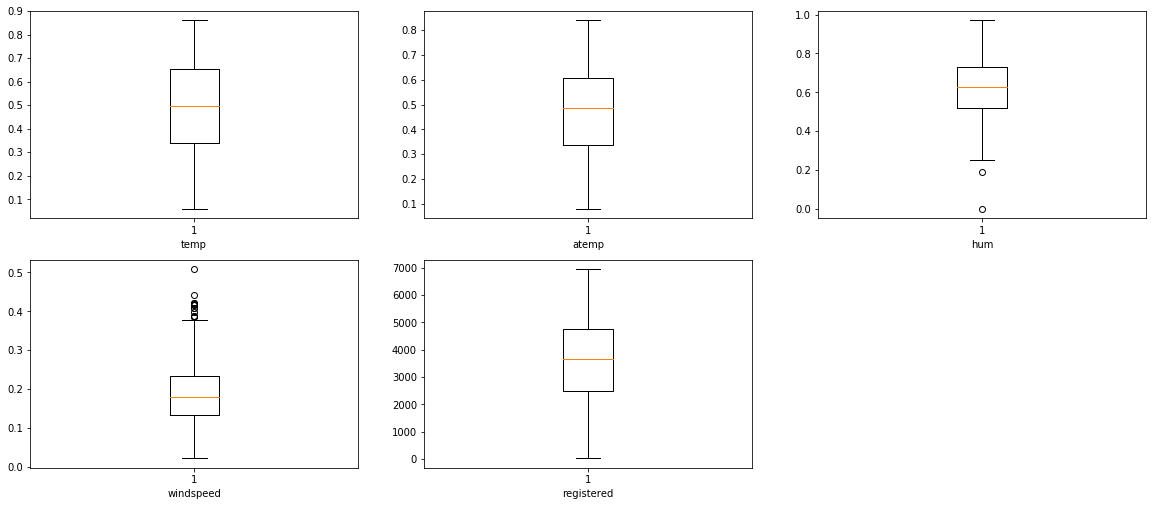

In [10]:
plt.figure(figsize=(20,13))
i = 1
for col in train_test.columns[[8,9,10,11,13]]:
    plt.subplot(3,3,i)
    plt.boxplot(train_test[col])
    plt.xlabel(col)
    i = i + 1

In [11]:
print("--- Null values ---")
for col in train_test.columns[[8,9,10,11,13]]:
    q75, q25 = np.percentile(train_test[col], [75,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # Replace with NA
    train_test.loc[train_test[col]<minimum, : col] = np.nan
    train_test.loc[train_test[col]>maximum, col] = np.nan
    print(str(col) + " : " + str(train_test[col].isnull().sum()))

--- Null values ---
temp : 0
atemp : 0
hum : 2
windspeed : 13
registered : 0


### Missing Value Analysis

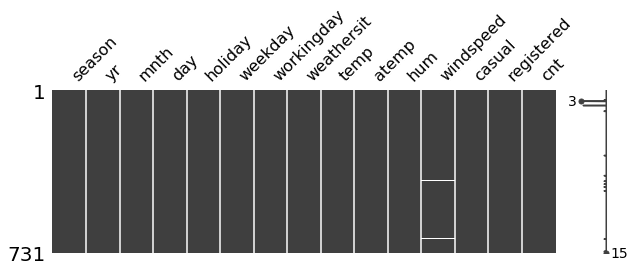

In [12]:
msno.matrix(train_test, figsize=(10,3))

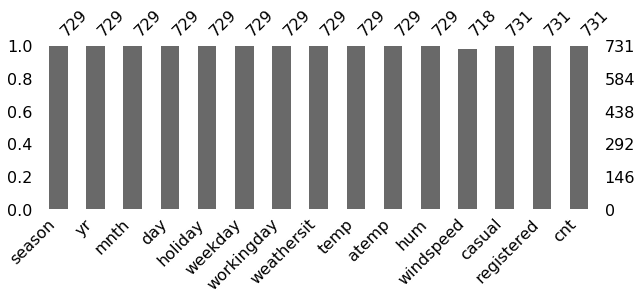

In [13]:
msno.bar(train_test, figsize=(10,3))

In [14]:
# imputing continuous variables 
imp = Imputer(missing_values='NaN', strategy='mean')
for col in train_test.columns[8:14]:
    train_test[[col]] = imp.fit_transform(train_test[[col]])

# imputing categorical variables    
imp = Imputer(missing_values='NaN', strategy='most_frequent')
for col in train_test.columns[:8]:
    train_test[[col]] = imp.fit_transform(train_test[[col]])    

# Feature Selection

In [15]:
train_test.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,1.0,0.0,1.0,3.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349
3,1.0,0.0,1.0,4.0,0.0,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,1.0,0.0,1.0,5.0,0.0,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


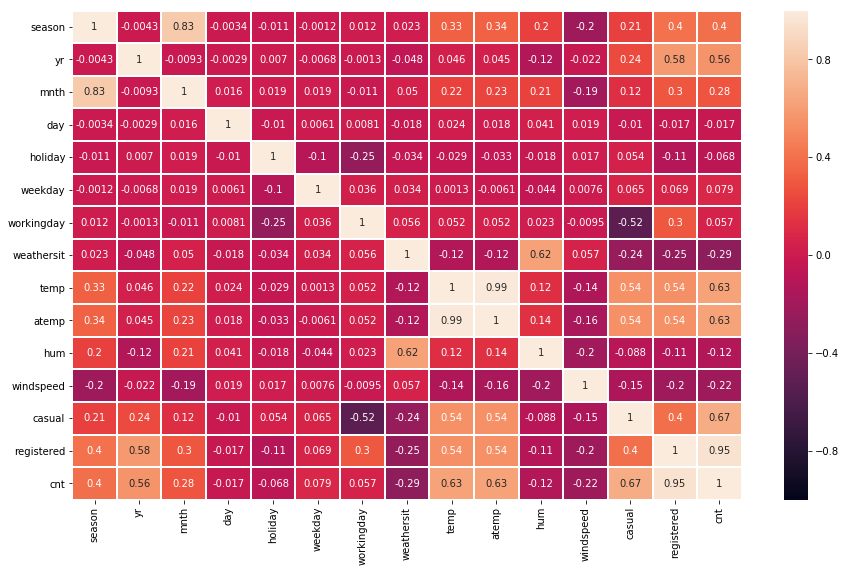

In [16]:
# heat map
plt.figure(figsize=(15, 9))
corr = train_test.corr()
sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, vmax=1)

In [17]:
# Dropping columns based on the above heatmap
train_test = train_test.drop(labels=['season', 'casual', 'atemp'], axis=1)

In [18]:
# pearson test for continuous features and continuous response
p_val = []
selected_cols = []
i=0
for col in train_test.columns[7:-1]:
    f, p = pearsonr(x=train_test[col], y=train_test['cnt'])
    p_val.append(p)
    print(col + " : " + str(p_val[i]))
    # selecting column if p-value is less than 0.05
    if (p<0.05):
        selected_cols.append(i)
    i=i+1    

temp : 1.71712895493147e-80
hum : 0.0009945525362460206
windspeed : 3.3590279561308322e-09
registered : 0.0


In [19]:
# All the continuous columns are having p-value less than 0.05. So, we dont need to remove any column based on pearson test. 

In [20]:
# Anova test for categorical features and continuous response
p_val = []
selected_cols = []
i=0
for col in train_test.columns[:7]:
    f, p = pearsonr(x=train_test[col], y=train_test['cnt'])
    p_val.append(p)
    print(col + " : " + str(p_val[i]))
    # selecting column if p-value is less than 0.05
    if (p<0.05):
        selected_cols.append(i)
    i=i+1  

yr : 7.586905431253606e-61
mnth : 8.425421468515559e-15
day : 0.6425295449728439
holiday : 0.064759357926115
weekday : 0.03296194420252188
workingday : 0.12454537988479998
weathersit : 1.5966862500132138e-15


In [21]:
# Selecting columns based on peaeson test
for i in range(7,12):
    selected_cols.append(i)
train_test = train_test.iloc[:, selected_cols]
train_test.head()

,yr,mnth,weekday,weathersit,temp,hum,windspeed,registered,cnt
0,0.0,1.0,6.0,2.0,0.344167,0.805833,0.160446,654.0,985
1,0.0,1.0,0.0,2.0,0.363478,0.696087,0.248539,670.0,801
2,0.0,1.0,1.0,1.0,0.196364,0.437273,0.248309,1229.0,1349
3,0.0,1.0,2.0,1.0,0.200000,0.590435,0.160296,1454.0,1562
4,0.0,1.0,3.0,1.0,0.226957,0.436957,0.186900,1518.0,1600


# Feature Scaling

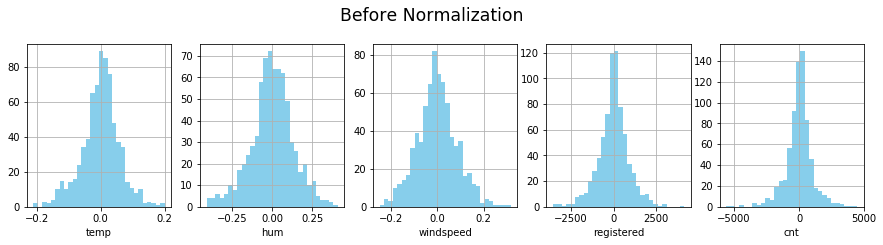

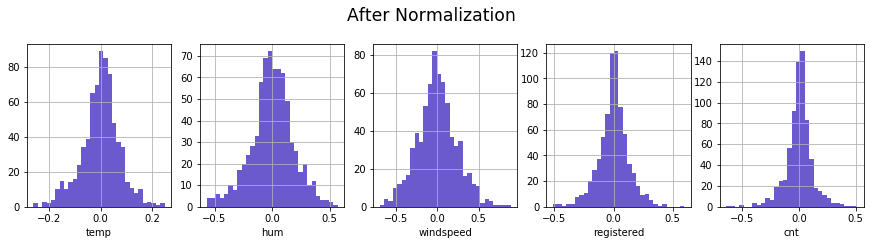

In [22]:
cols = ["temp", "hum", "windspeed", "registered", "cnt"]
plt.figure()
i = 1
plt.suptitle('Before Normalization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
for col in cols:
    plt.subplot(1,5,i)
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color='skyblue')
    p.set_xlabel(col)
    i = i + 1
    
plt.figure()
plt.suptitle('After Normalization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
i = 1
for col in cols:
    plt.subplot(1,5,i)
    train_test[col] = (train_test[col] - train_test[col].min())/(train_test[col].max() - train_test[col].min())
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color = 'slateblue')
    p.set_xlabel(col)
    i = i + 1    

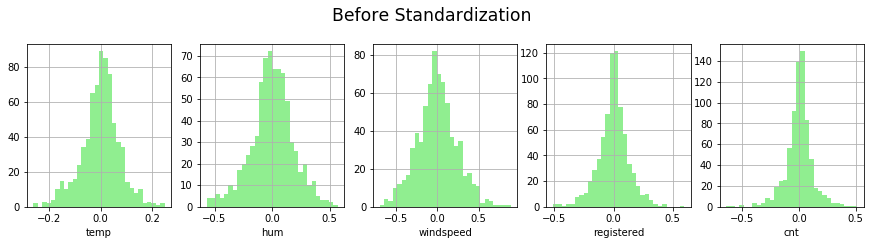

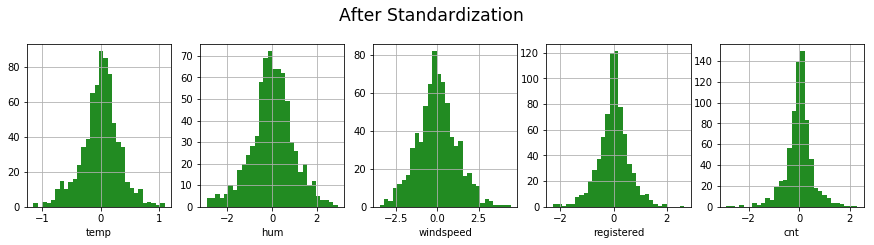

In [23]:
cols = ["temp", "hum", "windspeed", "registered", "cnt"]
plt.figure()
i = 1
plt.suptitle('Before Standardization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
for col in cols:
    plt.subplot(1,5,i)
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color='lightgreen')
    p.set_xlabel(col)
    i = i + 1
    

plt.figure()
plt.suptitle('After Standardization', x=0.5, y=1.05, ha='center', fontsize='xx-large')
i = 1
for col in cols:
    plt.subplot(1,5,i)
    train_test[col] = (train_test[col] - train_test[col].mean()) / train_test[col].std()
    p = train_test[col].diff().hist(figsize=(15,3), bins=30, color = 'forestgreen')
    p.set_xlabel(col)
    i = i + 1    

# SPLITTING DATA INTO TRAIN AND TEST

In [24]:
train_test.head()

,yr,mnth,weekday,weathersit,temp,hum,windspeed,registered,cnt
0,0.0,1.0,6.0,2.0,-0.827963,1.264449,-0.364668,-1.924153,-1.816709
1,0.0,1.0,0.0,2.0,-0.722423,0.478112,0.873479,-1.913899,-1.911691
2,0.0,1.0,1.0,1.0,-1.635745,-1.376309,0.870246,-1.555624,-1.628810
3,0.0,1.0,2.0,1.0,-1.615873,-0.278893,-0.366777,-1.411417,-1.518858
4,0.0,1.0,3.0,1.0,-1.468546,-1.378573,0.007143,-1.370398,-1.499242


In [25]:
X = train_test.iloc[:, :(train_test.shape[1]-1)]
y = train_test['cnt']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(548, 8)
(183, 8)
(548,)
(183,)


# MODEL BUILDING

In [27]:
Model_name = []
Rsq_Value = []
MAE_Value = []
RMSE_Value = []

def register_model_with_scores(name, rsq, mae, rmse):
    Model_name.append(name)
    Rsq_Value.append(rsq)
    MAE_Value.append(mae)
    RMSE_Value.append(rmse) 
        
def generate_score(y_test, predicted):
    rsq = r2_score(y_true=y_test, y_pred=predicted)
    mse = mean_squared_error(y_true=y_test, y_pred=predicted)
    mae = mean_absolute_error(y_test, predicted)
    rmse = np.sqrt(mse)
    print("R sq = " + str(rsq))
    print("MAE = " + str(mae))
    print("RMSE = " + str(rmse))  
    return (rsq, mae, rmse)

## Linear Reression

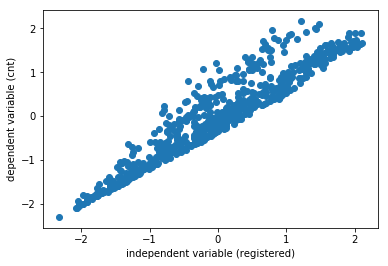

In [28]:
plt.scatter(train_test.registered, train_test[['cnt']])
plt.ylabel("dependent variable (cnt)")
plt.xlabel("independent variable (registered)")
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
model_name = "Linear Regression"
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
pred1 = lin_reg.predict(X_test)
pred1[0:10]

array([ 1.29099235, -1.46109688, -0.49750422, -0.08780702,  1.65404692,
        1.68391344, -1.61009519, -0.92082362,  1.52878048,  0.92106537])

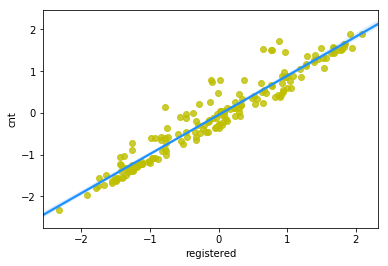

In [31]:
sns.regplot(X_test.registered, y_test, color='y', line_kws={'color' : 'dodgerblue'})

In [32]:
# Model Score
rsq_val, mae_val, rmse_val = generate_score(y_test, pred1)
register_model_with_scores("Linear Regression", rsq_val, mae_val, rmse_val)

R sq = 0.9456385549953561
MAE = 0.17391032139417595
RMSE = 0.23627654248260388


### BayesianRidge

In [33]:
from sklearn.linear_model import BayesianRidge
reg = BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [34]:
pred2 = reg.predict(X_test)
pred2[0:10]

array([ 1.28804928, -1.45989189, -0.49647303, -0.08806401,  1.65057881,
        1.68129726, -1.60817687, -0.91933015,  1.52851068,  0.91907467])

In [35]:
# Model Score
rsq_val, mse_val, rmse_val = generate_score(y_test, pred2)
register_model_with_scores("BayesianRidge", rsq_val, mse_val, rmse_val)

R sq = 0.9456792279373043
MAE = 0.17368882427301746
RMSE = 0.23618813552140805


## XGBoost Regressor

In [36]:
from xgboost import XGBRegressor, plot_importance, plot_tree
reg = XGBRegressor(n_estimators=500, seed=124, learning_rate=0.4)
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=124,
       silent=True, subsample=1)

In [37]:
pred3 = reg.predict(X_test)
pred3[0:10]

array([ 1.3015448 , -1.4700509 , -0.39570695,  0.5047592 ,  1.6701549 ,
        1.4212947 , -1.5839577 , -1.069461  ,  1.9479239 ,  0.8871292 ],
      dtype=float32)

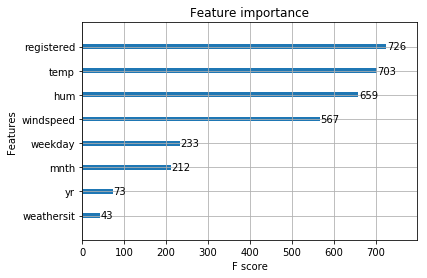

In [38]:
plot_importance(reg)

In [39]:
# Model Score
rsq_val, mse_val, rmse_val = generate_score(y_test, pred3)

R sq = 0.973500695210733
MAE = 0.11375480417517173
RMSE = 0.16496520498866155


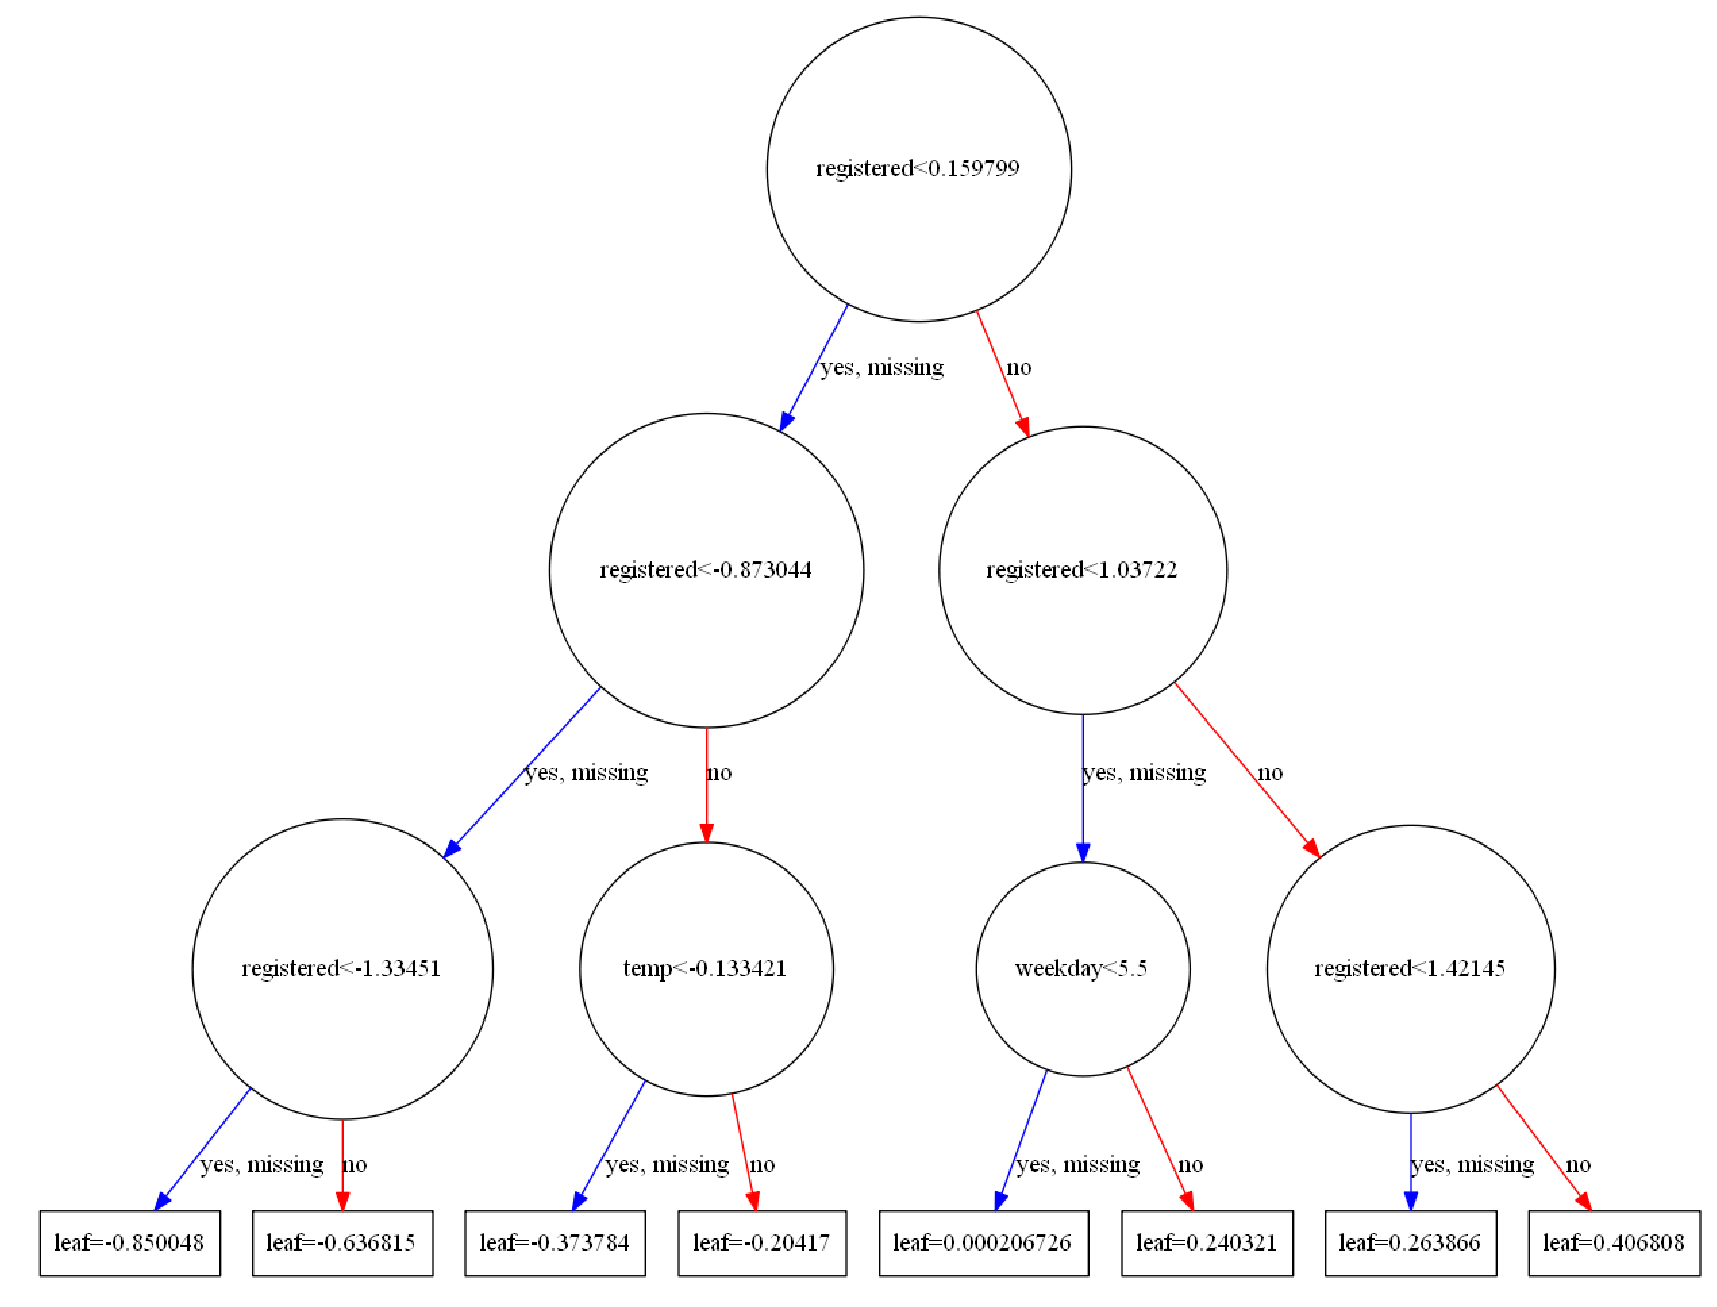

In [40]:
plot_tree(reg)
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

### XGBoost Parameter Tuning

#### n_estimator

In [41]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=i, seed=124)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [42]:
best_n_est = tune_parameter("n_estimator", np.arange(1, 150, 1))

Best n_estimator : 149
Achieved R-sq value : 0.9780668011730341


#### Learning rate

In [43]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)      
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [44]:
best_lr_rt = tune_parameter("learning_rate", np.arange(0.01, 1.5, 0.01))

Best learning_rate : 0.25
Achieved R-sq value : 0.9795367355639844


#### gamma

In [45]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=best_lr_rt, gamma=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)      
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [46]:
best_gamma = tune_parameter("gamma", np.arange(0, 5, 1))

Best gamma : 0
Achieved R-sq value : 0.9795367355639844


#### max_depth

In [47]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=best_lr_rt, gamma=best_gamma, max_depth=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [48]:
best_mx_dth = tune_parameter("max_depth", np.arange(1, 8, 1))

Best max_depth : 3
Achieved R-sq value : 0.9795367355639844


#### booster

In [49]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=best_lr_rt, gamma=best_gamma, 
                           max_depth=best_mx_dth, booster=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [50]:
best_bstr = tune_parameter("booster", ['gbtree', 'gblinear'])

Best booster : gbtree
Achieved R-sq value : 0.9795367355639844


#### min_child_weight

In [51]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=best_lr_rt, gamma=best_gamma, max_depth=best_mx_dth, 
                           booster='gbtree', min_child_weight=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [52]:
best_mn_cld_wt = tune_parameter("min_child_weight", np.arange(1, 15, 1))

Best min_child_weight : 1
Achieved R-sq value : 0.9795367355639844


#### final run with all the best derived parameters

In [53]:
reg = XGBRegressor(n_estimators=best_n_est, seed=124, learning_rate=best_lr_rt, gamma=best_gamma, max_depth=best_mx_dth, 
                   booster='gbtree', min_child_weight=best_mn_cld_wt)
reg.fit(X_train, y_train)
pred4 = reg.predict(X_test)
rsq_val, mse_val, rmse_val = generate_score(y_test, pred4)
register_model_with_scores("XGBoost", rsq_val, mse_val, rmse_val)

R sq = 0.9795367355639844
MAE = 0.0999505518614042
RMSE = 0.14496480279574753


# SVM

In [54]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
pred5 = reg.predict(X_test)
rsq_val, mse_val, rmse_val = generate_score(y_test, pred5)

R sq = 0.9590948110600016
MAE = 0.13569886259704203
RMSE = 0.20495773469051962


### SVM Parameter Tuning

#### C value

In [56]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = SVR(C=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [57]:
best_svm_C = tune_parameter("C", np.arange(1, 5, 1))

Best C : 2
Achieved R-sq value : 0.9616786266349729


#### epsilon

In [58]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = SVR(C=best_svm_C, epsilon=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [59]:
best_svm_eps = tune_parameter("epsilon", np.arange(0, 1, 0.1))

Best epsilon : 0.0
Achieved R-sq value : 0.9649372209658016


#### gamma

In [60]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = SVR(C=best_svm_C, epsilon=best_svm_eps, gamma=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [61]:
best_svm_gamma = tune_parameter("gamma", np.arange(0.1, 1, 0.1))

Best gamma : 0.1
Achieved R-sq value : 0.9694878607605789


In [62]:
best_svm_gamma = tune_parameter("gamma", np.arange(0.01, 0.1, 0.01))

Best gamma : 0.060000000000000005
Achieved R-sq value : 0.975847736580453


In [63]:
best_svm_gamma = tune_parameter("gamma", np.arange(0.05, 0.07, 0.001))

Best gamma : 0.05600000000000001
Achieved R-sq value : 0.9760511507455698


#### tol

In [64]:
def tune_parameter(param_name, all_parameter_values):
    best_parameter_list = []
    for i in all_parameter_values:
        reg = SVR(C=best_svm_C, epsilon=best_svm_eps, gamma=best_svm_gamma, tol=i)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        rsq = r2_score(y_true=y_test, y_pred=pred)
        best_parameter_list.append(rsq)    
    a = 0
    for i in best_parameter_list:
        if i == max(best_parameter_list):
            best_parameter_index = a
        a = a + 1  
    print("Best " + param_name + " : " + str(all_parameter_values[best_parameter_index]))   
    print("Achieved R-sq value : " + str(max(best_parameter_list)))
    return all_parameter_values[best_parameter_index]

In [65]:
best_svm_tol = tune_parameter("tol", np.arange(0.0001, 0.01, 0.0001))

Best tol : 0.005900000000000001
Achieved R-sq value : 0.9761492971067136


#### final run with all the best derived parameters

In [66]:
reg = SVR(gamma=best_svm_gamma, epsilon=best_svm_eps, C=best_svm_C, tol=best_svm_tol)
reg.fit(X_train, y_train)
pred6 = reg.predict(X_test)
rsq_val, mse_val, rmse_val = generate_score(y_test, pred6)
register_model_with_scores("SVM", rsq_val, mse_val, rmse_val)

R sq = 0.9761492971067136
MAE = 0.10273346950989362
RMSE = 0.1565040937560758


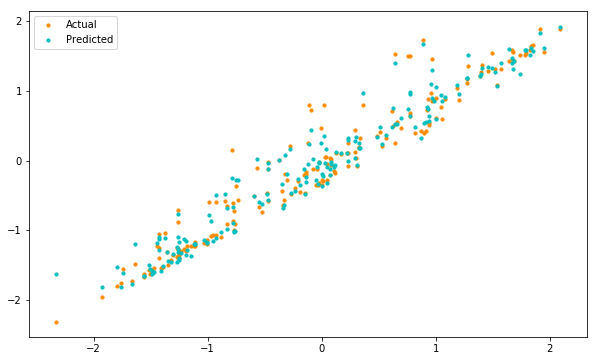

In [67]:
plt.figure(figsize=(10,6))
a = plt.scatter(X_test.registered, y_test, color='darkorange', s=10)
b = plt.scatter(X_test.registered, pred6, color='c', label='RBF model', s=10)
plt.legend([a, b], ["Actual", "Predicted"])
plt.show()

# Models Summary

In [68]:
df = pd.DataFrame({'Model_name' : Model_name, 
              'R-sq' : Rsq_Value, 
              'MAE' : MAE_Value, 
              'RMSE' : RMSE_Value}, 
                  columns=['Model_name', 'R-sq', 'MAE', 'RMSE'])
df

,Model_name,R-sq,MAE,RMSE
0,Linear Regression,0.945639,0.173910,0.236277
1,BayesianRidge,0.945679,0.173689,0.236188
2,XGBoost,0.979537,0.099951,0.144965
3,SVM,0.976149,0.102733,0.156504


# Conclusion

### From the above summary of the models we can conclude that XGBoost regressor is performing better as compared to other models.This conclusion is made on the basis of R-square, mean absolute error(MAE) and root mean square error(RMSE) values.
